## Import Dependencies

In [2]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name())
print(torch.cuda.memory_allocated())

True
0
NVIDIA GeForce RTX 3050 Laptop GPU
0


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import gym
from gym import spaces
import networkx as nx
import numpy as np
from stable_baselines3 import PPO
import random
from stable_baselines3.common.env_checker import check_env

## Create a graph network

In [4]:
def create_real_time_graph():
    """
    Creates a real-time graph network with 20 nodes representing locations
    and edges with weights representing distances in kilometers.

    Returns:
        G (networkx.Graph): A graph object with nodes and weighted edges.
    """
    G = nx.Graph()

    # Add nodes
    locations = {i: f"{i+1}" for i in range(20)}
    G.add_nodes_from(locations.keys())

    # Define edges with distances (weights)
    edges = [
        (0, 1, 5), (0, 2, 10), (1, 3, 7), (2, 3, 6),
        (2, 4, 15), (3, 5, 9), (4, 5, 4), (4, 6, 8),
        (5, 7, 3), (6, 8, 12), (7, 9, 6), (8, 9, 5),
        (8, 10, 14), (9, 11, 7), (10, 12, 11), (11, 13, 9),
        (12, 14, 13), (13, 15, 10), (14, 16, 6), (15, 17, 12),
        (16, 18, 8), (17, 19, 9), (18, 19, 5)
    ]

    # Add edges to the graph
    for edge in edges:
        G.add_edge(edge[0], edge[1], weight=edge[2])

    return G, locations

In [5]:
def plot_graph(G, locations):
    """
    Plots the given graph with enhanced visualization and sufficient spacing.

    Args:
        G (networkx.Graph): The graph object to be visualized.
        locations (dict): A dictionary mapping node IDs to location names.
    """
    # Generate positions for the nodes with increased spacing (k=2.5)
    pos = nx.spring_layout(G, seed=42, k=4)

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=800, node_color="lightblue", edgecolors="black")

    # Draw the edges
    nx.draw_networkx_edges(G, pos, width=1.5, edge_color="gray", alpha=0.7)

    # Add labels for nodes
    nx.draw_networkx_labels(G, pos, labels=locations, font_size=10, font_color="black")

    # Add edge labels (weights)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v} km" for k, v in edge_labels.items()},
                                 font_size=8, font_color="black")

    # Add title and improve layout
    plt.title("Real-Time Road Network with 20 Nodes", fontsize=16, fontweight="bold")
    plt.axis("off")  # Turn off axis
    plt.tight_layout()
    plt.show()

In [6]:
def print_all_paths(graph, start, goal):
    """
    Prints all possible paths between the start and goal nodes in the graph.

    Args:
        graph (networkx.Graph): The graph object.
        start (int): The starting node.
        goal (int): The target node.
    """
    # Find all simple paths
    paths = list(nx.all_simple_paths(graph, source=start, target=goal))
    print(f"All possible paths from {start} to {goal}:")
    for i, path in enumerate(paths, start=1):
        print(f"Path {i}: {' -> '.join(map(str, path))}")


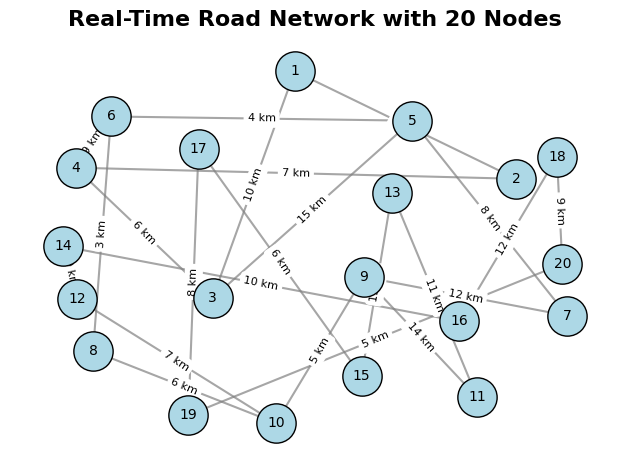

In [7]:
# Create the graph and plot it
graph, location_labels = create_real_time_graph()
plot_graph(graph, location_labels)


In [8]:
print_all_paths(graph, start=0, goal=17)

All possible paths from 0 to 17:
Path 1: 0 -> 1 -> 3 -> 2 -> 4 -> 5 -> 7 -> 9 -> 8 -> 10 -> 12 -> 14 -> 16 -> 18 -> 19 -> 17
Path 2: 0 -> 1 -> 3 -> 2 -> 4 -> 5 -> 7 -> 9 -> 11 -> 13 -> 15 -> 17
Path 3: 0 -> 1 -> 3 -> 2 -> 4 -> 6 -> 8 -> 9 -> 11 -> 13 -> 15 -> 17
Path 4: 0 -> 1 -> 3 -> 2 -> 4 -> 6 -> 8 -> 10 -> 12 -> 14 -> 16 -> 18 -> 19 -> 17
Path 5: 0 -> 1 -> 3 -> 5 -> 4 -> 6 -> 8 -> 9 -> 11 -> 13 -> 15 -> 17
Path 6: 0 -> 1 -> 3 -> 5 -> 4 -> 6 -> 8 -> 10 -> 12 -> 14 -> 16 -> 18 -> 19 -> 17
Path 7: 0 -> 1 -> 3 -> 5 -> 7 -> 9 -> 8 -> 10 -> 12 -> 14 -> 16 -> 18 -> 19 -> 17
Path 8: 0 -> 1 -> 3 -> 5 -> 7 -> 9 -> 11 -> 13 -> 15 -> 17
Path 9: 0 -> 2 -> 3 -> 5 -> 4 -> 6 -> 8 -> 9 -> 11 -> 13 -> 15 -> 17
Path 10: 0 -> 2 -> 3 -> 5 -> 4 -> 6 -> 8 -> 10 -> 12 -> 14 -> 16 -> 18 -> 19 -> 17
Path 11: 0 -> 2 -> 3 -> 5 -> 7 -> 9 -> 8 -> 10 -> 12 -> 14 -> 16 -> 18 -> 19 -> 17
Path 12: 0 -> 2 -> 3 -> 5 -> 7 -> 9 -> 11 -> 13 -> 15 -> 17
Path 13: 0 -> 2 -> 4 -> 5 -> 7 -> 9 -> 8 -> 10 -> 12 -> 14 -> 16 -> 

## Create graph network with random nodes and edges with chaging stations at random locations

Edges with weights:
1 - 8: 4.96
1 - 7: 18.67
1 - 16: 7.43
2 - 9: 15.56
2 - 10: 9.32
2 - 15: 10.51
3 - 17: 16.41
3 - 12: 12.74
3 - 16: 2.18
4 - 6: 17.72
4 - 18: 12.64
4 - 16: 5.29
5 - 12: 8.94
5 - 20: 9.3
5 - 17: 15.93
6 - 9: 7.65
6 - 7: 18.11
7 - 10: 5.25
8 - 9: 5.01
8 - 13: 11.18
10 - 18: 6.95
11 - 13: 6.91
11 - 17: 8.2
11 - 19: 1.81
12 - 14: 3.78
13 - 15: 4.0
14 - 20: 11.82
14 - 15: 17.3
18 - 20: 17.2

Nodes with 'charging_station' attribute:
Node 1: Charging Station
Node 2: No Charging Station
Node 3: No Charging Station
Node 4: No Charging Station
Node 5: No Charging Station
Node 6: Charging Station
Node 7: No Charging Station
Node 8: No Charging Station
Node 9: No Charging Station
Node 10: No Charging Station
Node 11: No Charging Station
Node 12: Charging Station
Node 13: Charging Station
Node 14: No Charging Station
Node 15: No Charging Station
Node 16: No Charging Station
Node 17: No Charging Station
Node 18: No Charging Station
Node 19: No Charging Station
Node 20: Charging Sta

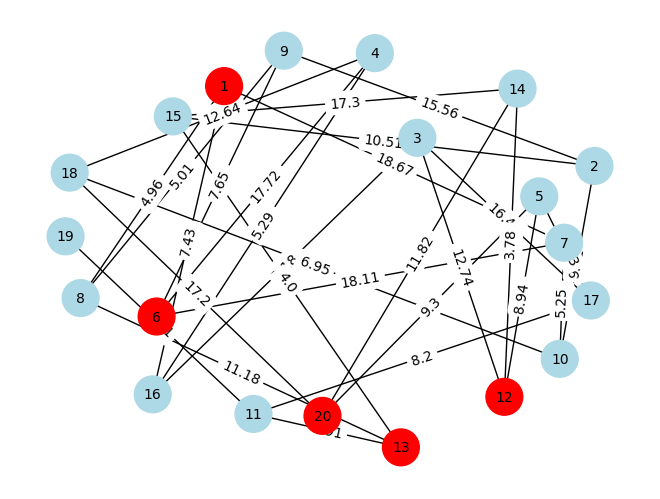

In [9]:
def create_random_graph_with_constraints(num_nodes):
    """
    Create a random graph with the constraint that each node has at most 3 connections
    and randomly assign a 'charging_station' attribute to at least 5 nodes.
    
    Args:
        num_nodes (int): The number of nodes in the graph.
    
    Returns:
        G: A NetworkX graph object.
    """
    G = nx.Graph()  # Create an empty undirected graph

    # Add nodes to the graph (starting from 1 instead of 0)
    for i in range(1, num_nodes + 1):
        G.add_node(i)

    # Add edges with random weights ensuring each node has at most 3 connections
    while True:
        node1 = random.randint(1, num_nodes)
        node2 = random.randint(1, num_nodes)

        if node1 != node2 and G.degree[node1] < 3 and G.degree[node2] < 3:
            if not G.has_edge(node1, node2):  # Ensure no duplicate edges
                weight = round(random.uniform(1, 20), 2)  # Random weight between 1 and 20
                G.add_edge(node1, node2, weight=weight)

        # Stop when all nodes have at least one connection and at most 3 connections
        if all(1 <= G.degree[node] <= 3 for node in G.nodes):
            break

    # Randomly assign 'charging_station' attribute to at least 5 nodes
    charging_stations = random.sample(list(G.nodes), 5)  # Convert G.nodes to a list
    for node in G.nodes:
        G.nodes[node]['charging_station'] = node in charging_stations

    return G

# Generate a random graph with 20 nodes
num_nodes = 20
G = create_random_graph_with_constraints(num_nodes)

# Print the edges with weights
print("Edges with weights:")
for u, v, weight in G.edges(data="weight"):
    print(f"{u} - {v}: {weight}")

# Print nodes with charging station attribute
print("\nNodes with 'charging_station' attribute:")
for node, data in G.nodes(data=True):
    print(f"Node {node}: {'Charging Station' if data['charging_station'] else 'No Charging Station'}")

# Draw the graph with edge weights
k_value = 5  
pos = nx.spring_layout(G, k=k_value)  # Position nodes using a spring layout
node_colors = ["red" if G.nodes[node]['charging_station'] else "lightblue" for node in G.nodes]

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, font_size=10)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

## Create graph network with charging stations at selected locations

In [29]:
def create_real_time_graph_with_charging_stations():
    """
    Creates a real-time graph network with 20 nodes (starting from 1) representing locations,
    edges with weights representing distances in kilometers, and charging stations at specific nodes.

    Returns:
        G (networkx.Graph): A graph object with nodes and weighted edges.
        locations (dict): A dictionary mapping node IDs to location names.
    """
    G = nx.Graph()

    # Add nodes
    locations = {i: f"{i}" for i in range(1, 21)}
    G.add_nodes_from(locations.keys())

    # Define charging stations
    charging_stations = {3, 5, 7, 9, 11, 13}

    # Add a 'charging_station' attribute to each node
    for node in G.nodes:
        G.nodes[node]['charging_station'] = node in charging_stations

    # Define edges with distances (weights)
    edges = [
        (1, 2, 5), (1, 3, 10), (2, 4, 7), (3, 4, 6),
        (3, 5, 15), (4, 6, 9), (5, 6, 4), (5, 7, 8),
        (6, 8, 3), (7, 9, 12), (8, 10, 6), (9, 10, 5),
        (9, 11, 14), (10, 12, 7), (11, 13, 11), (12, 14, 9),
        (13, 15, 13), (14, 16, 10), (15, 17, 6), (16, 18, 12),
        (17, 19, 8), (18, 20, 9), (19, 20, 5)
    ]

    # Add edges to the graph
    for edge in edges:
        G.add_edge(edge[0], edge[1], weight=edge[2])

    return G, locations


In [30]:
def plot_graph_with_charging_stations(G, locations):
    """
    Plots the given graph with enhanced visualization, charging station markers, and sufficient spacing.

    Args:
        G (networkx.Graph): The graph object to be visualized.
        locations (dict): A dictionary mapping node IDs to location names.
    """
    # Generate positions for the nodes with increased spacing (k=4)
    pos = nx.spring_layout(G, seed=42, k=4)

    # Separate nodes into two categories: with and without charging stations
    charging_nodes = [node for node, data in G.nodes(data=True) if data['charging_station']]
    non_charging_nodes = [node for node in G.nodes if node not in charging_nodes]

    # Draw the nodes without charging stations
    nx.draw_networkx_nodes(G, pos, nodelist=non_charging_nodes, node_size=800, 
                           node_color="lightblue", edgecolors="black")

    # Draw the nodes with charging stations
    nx.draw_networkx_nodes(G, pos, nodelist=charging_nodes, node_size=800, 
                           node_color="red", edgecolors="black", label="Charging Station")

    # Draw the edges
    nx.draw_networkx_edges(G, pos, width=1.5, edge_color="gray", alpha=0.7)

    # Add labels for nodes
    nx.draw_networkx_labels(G, pos, labels=locations, font_size=10, font_color="black")

    # Add edge labels (weights)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v} km" for k, v in edge_labels.items()},
                                 font_size=8, font_color="darkgreen")

    # Add title, legend, and improve layout
    plt.title("Real-Time Road Network with Charging Stations", fontsize=16, fontweight="bold")
    plt.legend(scatterpoints=1, loc="upper left", markerscale=0.7)
    plt.axis("off")  # Turn off axis
    plt.tight_layout()
    plt.show()    

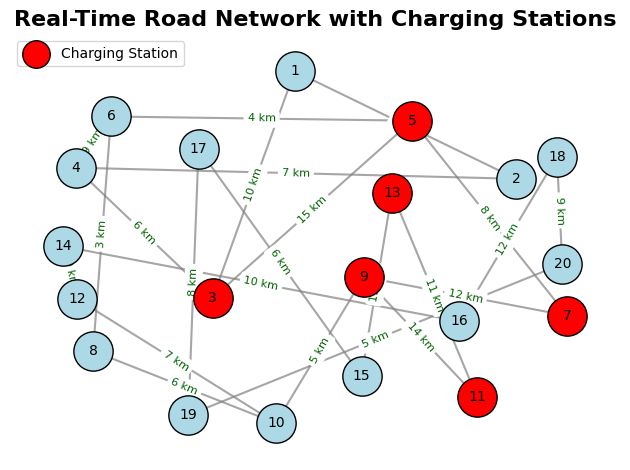

All possible paths from 1 to 17:
Path 1: 1 -> 2 -> 4 -> 3 -> 5 -> 6 -> 8 -> 10 -> 9 -> 11 -> 13 -> 15 -> 17
Path 2: 1 -> 2 -> 4 -> 3 -> 5 -> 6 -> 8 -> 10 -> 12 -> 14 -> 16 -> 18 -> 20 -> 19 -> 17
Path 3: 1 -> 2 -> 4 -> 3 -> 5 -> 7 -> 9 -> 10 -> 12 -> 14 -> 16 -> 18 -> 20 -> 19 -> 17
Path 4: 1 -> 2 -> 4 -> 3 -> 5 -> 7 -> 9 -> 11 -> 13 -> 15 -> 17
Path 5: 1 -> 2 -> 4 -> 6 -> 5 -> 7 -> 9 -> 10 -> 12 -> 14 -> 16 -> 18 -> 20 -> 19 -> 17
Path 6: 1 -> 2 -> 4 -> 6 -> 5 -> 7 -> 9 -> 11 -> 13 -> 15 -> 17
Path 7: 1 -> 2 -> 4 -> 6 -> 8 -> 10 -> 9 -> 11 -> 13 -> 15 -> 17
Path 8: 1 -> 2 -> 4 -> 6 -> 8 -> 10 -> 12 -> 14 -> 16 -> 18 -> 20 -> 19 -> 17
Path 9: 1 -> 3 -> 4 -> 6 -> 5 -> 7 -> 9 -> 10 -> 12 -> 14 -> 16 -> 18 -> 20 -> 19 -> 17
Path 10: 1 -> 3 -> 4 -> 6 -> 5 -> 7 -> 9 -> 11 -> 13 -> 15 -> 17
Path 11: 1 -> 3 -> 4 -> 6 -> 8 -> 10 -> 9 -> 11 -> 13 -> 15 -> 17
Path 12: 1 -> 3 -> 4 -> 6 -> 8 -> 10 -> 12 -> 14 -> 16 -> 18 -> 20 -> 19 -> 17
Path 13: 1 -> 3 -> 5 -> 6 -> 8 -> 10 -> 9 -> 11 -> 13 -> 15

In [32]:
# Create the graph with charging stations and plot it
graph_cs, location_labels_cs = create_real_time_graph_with_charging_stations()
plot_graph_with_charging_stations(graph_cs, location_labels_cs)
print_all_paths(graph_cs, start=1, goal=17)

## Basic RL Algorithm

In [60]:
class GraphNavigationEnv(gym.Env):
    def __init__(self, graph, start_node, end_node):
        super(GraphNavigationEnv, self).__init__()
        self.graph = graph
        self.start_node = start_node
        self.end_node = end_node
        self.current_node = start_node

        # Action space: all possible nodes
        self.action_space = gym.spaces.Discrete(len(graph.nodes))

        # Observation space: current node (one-hot encoded representation)
        self.observation_space = gym.spaces.Box(
            low=0, high=1, shape=(len(graph.nodes),), dtype=np.float32
        )

    def reset(self):
        self.current_node = self.start_node
        return self._get_obs()

    def step(self, action):
        action = int(action)
        if action in self.graph.neighbors(self.current_node):
            # Use the weight (distance) as a negative reward
            reward = -self.graph[self.current_node][action]["weight"]
            self.current_node = action
        else:
            reward = -10  # Penalty for invalid moves

        # Check if the end node has been reached
        done = self.current_node == self.end_node
        return self._get_obs(), reward, done, {}

    def _get_obs(self):
        obs = np.zeros(len(self.graph.nodes))
        obs[self.current_node - 1] = 1  # One-hot encoding (nodes start from 1)
        return obs

# Train and save the model
graph_cs, location_labels_cs = create_real_time_graph_with_charging_stations()
env = GraphNavigationEnv(graph_cs, start_node=1, end_node=17)

# Train the PPO model
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=2000)

# Save the trained model
model.save("graph_navigation_model")

# Load the trained model
model = PPO.load("graph_navigation_model")

# Function to find the shortest path using the trained model
def find_shortest_path(graph, start_node, end_node):
    env = GraphNavigationEnv(graph, start_node, end_node)
    obs = env.reset()
    done = False
    path = []
    total_reward = 0

    while not done:
        action, _ = model.predict(obs)
        obs, reward, done, _ = env.step(action)
        total_reward += reward
        # Append the node to the path only if it hasn't been added already
        if not path or path[-1] != np.argmax(obs) + 1:
            path.append(np.argmax(obs) + 1)  # Add 1 to convert 0-indexed to 1-indexed

    # Format the path as a string with arrows
    path_str = "->".join(map(str, path))
    return path_str, total_reward

# Predict the shortest path between any two nodes
start_node, end_node = 1, 17
path_str, total_reward = find_shortest_path(graph_cs, start_node, end_node)
print(f"Shortest path from node {start_node} to node {end_node}: {path_str}")
print(f"Total reward: {total_reward}")


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1.24e+03  |
|    ep_rew_mean     | -1.23e+04 |
| time/              |           |
|    fps             | 257       |
|    iterations      | 1         |
|    time_elapsed    | 7         |
|    total_timesteps | 2048      |
----------------------------------
Shortest path from node 1 to node 17: 1->3->1->3->1->2->4->2->4->3->5->6->5->6->5->6->4->2->4->3->1->3->5->3->5->6->5->6->5->7->5->6->5->7->5->7->9->11->13->15->17
Total reward: -2671


In [72]:
import gym
from gym import spaces

def define_env(graph_cs, location_labels_cs):
  """
  Defines the environment for the shortest path finding problem.

  Args:
      graph_cs: The graph representation.
      location_labels_cs: Labels for the locations in the graph.

  Returns:
      A Gym environment object.
  """

  class GraphNavigationEnv(gym.Env):
    def __init__(self, graph_cs, location_labels_cs):
      super(GraphNavigationEnv, self).__init__()
      self.graph_cs = graph_cs
      self.location_labels_cs = location_labels_cs
      self.num_nodes = len(graph_cs)
      self.observation_space = spaces.Discrete(self.num_nodes) 
      self.action_space = spaces.Discrete(self.num_nodes) 
      self.current_node = None
      self.goal_node = None

    def reset(self):
      """
      Resets the environment to a random starting state.

      Returns:
          The initial observation.
      """
      self.current_node = np.random.randint(0, self.num_nodes) 
      self.goal_node = np.random.randint(0, self.num_nodes) 
      while self.goal_node == self.current_node: 
        self.goal_node = np.random.randint(0, self.num_nodes) 
      return self.current_node

    def step(self, action):
      """
      Executes an action in the environment.

      Args:
          action: The chosen action (index of the next node).

      Returns:
          A tuple containing:
              - The next observation.
              - The reward.
              - A boolean indicating whether the episode is done.
              - A dictionary of additional information.
      """
      next_node = action
      reward = -1  # Negative reward for each step

      if next_node == self.goal_node:
        reward = 100  # Large reward for reaching the goal
        done = True
      else:
        done = False

      info = {'is_success': next_node == self.goal_node, 'next_node': next_node}
        

      self.current_node = next_node

      return next_node, reward, done, info

  return GraphNavigationEnv(graph_cs, location_labels_cs)

In [73]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.vec_env import DummyVecEnv
import numpy as np

# Assuming you have the following functions defined:
# - create_real_time_graph_with_charging_stations() 
# - define_env(graph_cs, location_labels_cs) 

def train_ppo_for_shortest_path(graph_cs, location_labels_cs, epochs=20):
  """
  Trains a PPO agent to find the shortest path in a graph.

  Args:
      graph_cs: The graph representation.
      location_labels_cs: Labels for the locations in the graph.
      epochs: Number of training epochs.

  Returns:
      Trained PPO model.
  """

  # Create the environment
  env = define_env(graph_cs, location_labels_cs) 
  #check_env(env) 
  env = DummyVecEnv([lambda: env]) 

  # Create and train the PPO model
  model = PPO("MlpPolicy", env, verbose=1) 
  model.learn(total_timesteps=int(100 * epochs)) 

  return model

def predict_shortest_path(model, start_node, end_node):
  """
  Predicts the shortest path using the trained PPO model.

  Args:
      model: Trained PPO model.
      start_node: Starting node.
      end_node: Ending node.

  Returns:
      List of nodes in the predicted shortest path.
  """

  obs = env.reset() 
  path = [start_node] 
  done = False

  while not done:
    action, _states = model.predict(obs)
    action = action[0]  # Extract the first action value
    obs, reward, done, info = env.step(action) 
    if info['is_success']: 
      path.append(info['next_node']) 

  return path

# Example usage:
if __name__ == "__main__":
  graph_cs, location_labels_cs = create_real_time_graph_with_charging_stations() 
  model = train_ppo_for_shortest_path(graph_cs, location_labels_cs, epochs=10)  # Train for 10 epochs

  start_node = 1
  end_node = 17
  shortest_path = predict_shortest_path(model, start_node, end_node) 

  print(f"Shortest path from node {start_node} to node {end_node}: {shortest_path}")

Using cuda device
---------------------------------
| rollout/           |          |
|    success_rate    | 1        |
| time/              |          |
|    fps             | 253      |
|    iterations      | 1        |
|    time_elapsed    | 8        |
|    total_timesteps | 2048     |
---------------------------------


KeyError: 'is_success'